In [1]:
import argparse

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

from lang_sam import LangSAM

/home/psrahul/anaconda3/envs/ode/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/media/psrahul/files/Repositories/object-pose-editor/groundingdino/models/GroundingDINO/ms_deform_attn.py:31: UserWarning: Failed to load custom C++ ops. Running on CPU mode Only!
  warnings.warn("Failed to load custom C++ ops. Running on CPU mode Only!")


In [2]:
model = LangSAM()
image_pil = Image.open("sample_input_images/chair.jpg")
masks, boxes, phrases, logits = model.predict(image_pil.convert("RGB"), "chair")
masks=masks.numpy()[0]


/home/psrahul/anaconda3/envs/ode/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased
Model loaded from /home/psrahul/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


/home/psrahul/anaconda3/envs/ode/lib/python3.10/site-packages/transformers/modeling_utils.py:962: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/home/psrahul/anaconda3/envs/ode/lib/python3.10/site-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/home/psrahul/anaconda3/envs/ode/lib/python3.10/site-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


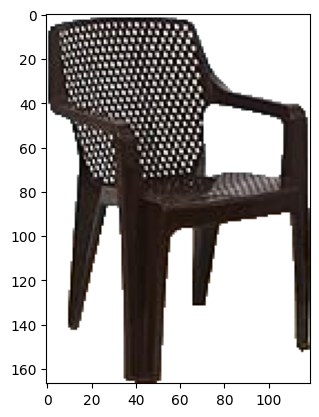

In [3]:
boxes=[int(x) for x in boxes.tolist()[0]]

image_array=np.array(image_pil)/255
masked_image_array=np.copy(image_array)
white_image_array=np.ones_like(masked_image_array,dtype=np.float32)

bounding_box=white_image_array*(1-masks[:, :, np.newaxis])+masked_image_array*masks[:, :, np.newaxis]
bounding_box=bounding_box[int(boxes[1]):int(boxes[3]),int(boxes[0]):int(boxes[2]),:]

plt.imshow(bounding_box)

In [ ]:
boxes=boxes.astype(np.int32)


In [ ]:
boxes=list(boxes[0])

In [ ]:
plt.imshow(bounding_box)

In [ ]:
boxes